In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [239]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [240]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [241]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [242]:
train.shape

(614, 13)

In [243]:
test.shape

(367, 12)

In [244]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [245]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [246]:
train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

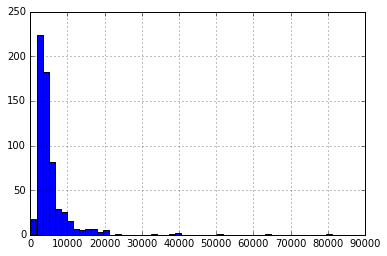

In [247]:
train['ApplicantIncome'].hist(bins=50, color='Blue')
plt.show()

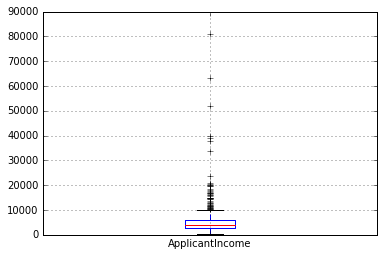

In [248]:
train.boxplot(column='ApplicantIncome')
plt.show()

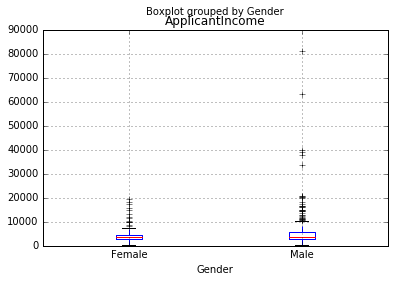

In [249]:
train.boxplot(column='ApplicantIncome', by='Gender')
plt.show()

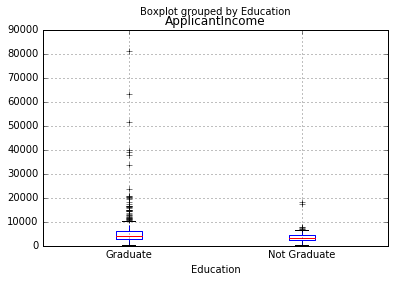

In [250]:
train.boxplot(column='ApplicantIncome', by='Education')
plt.show()

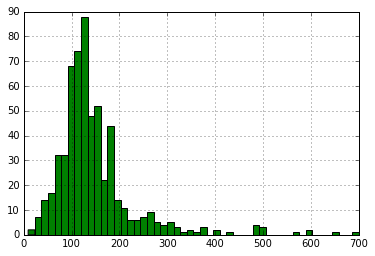

In [251]:
train['LoanAmount'].hist(bins=50 ,color='Green')
plt.show()

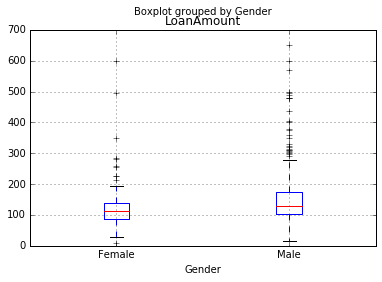

In [252]:
train.boxplot(column='LoanAmount', by='Gender')
plt.show()

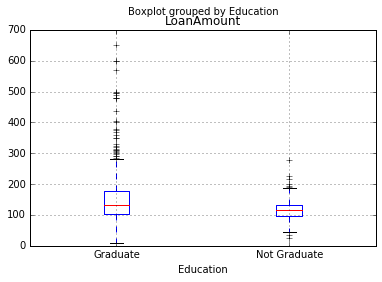

In [253]:
train.boxplot(column='LoanAmount', by='Education')
plt.show()

In [254]:
temp1 = train['Credit_History'].value_counts()
temp2 = train.pivot_table(values='Loan_Status', index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())
print("Frequency table for Credit History.")
print(temp1)
print("Probability of getting Loan for each credit history class.")
print(temp2)

Frequency table for Credit History.
1.0    475
0.0     89
Name: Credit_History, dtype: int64
Probability of getting Loan for each credit history class.
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


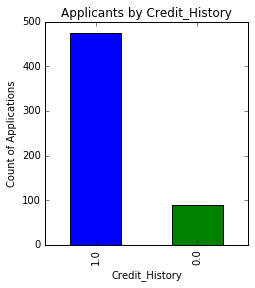

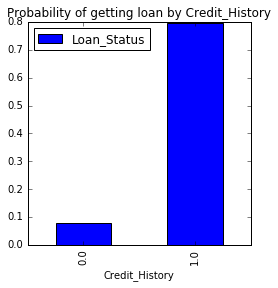

In [255]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applications')
ax1.set_title('Applicants by Credit_History')
temp1.plot(kind='bar')

'''ax2 = fig.add_subplot(122)
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probablity of getting loan')
ax2.set_label('Probability of getting loan by credit history')
'''
temp2.plot(figsize=(4,4),title='Probability of getting loan by Credit_History',kind='bar')

plt.show()

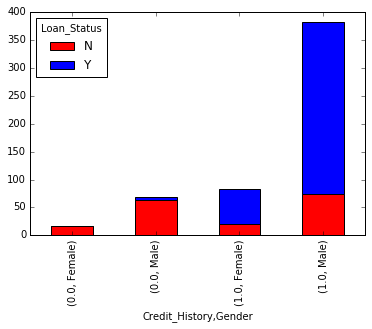

In [256]:
temp3 = pd.crosstab([train['Credit_History'],train['Gender']],train['Loan_Status'])
temp3.plot(kind='bar',stacked=True,color=['red','blue'],grid=False)
plt.show()

In [257]:
print(train.isnull().any())

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool


In [258]:
train.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

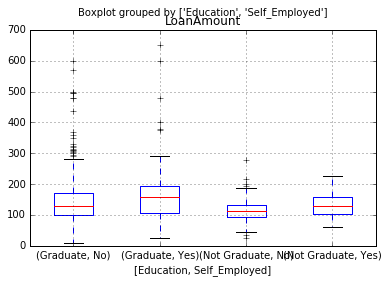

In [259]:
train.boxplot(column='LoanAmount',by=['Education','Self_Employed'])
plt.show()

In [260]:
train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [261]:
train['Self_Employed'].fillna('No', inplace=True)

In [262]:
table = train.pivot_table(values='LoanAmount',
                          index='Self_Employed',
                          columns='Education',
                          aggfunc=np.median)
table

Education,Graduate,Not Graduate
Self_Employed,,
No,130.0,113.0
Yes,157.5,130.0


In [263]:
def fage(x):
    return table.loc[x['Self_Employed'],x['Education']]

axis=0 means operations done column wise and axis=1 means row wise.

In [264]:
train['LoanAmount'].fillna(train[train['LoanAmount'].isnull()]
                          .apply(fage, axis=1), inplace=True)

Treating Extreme values

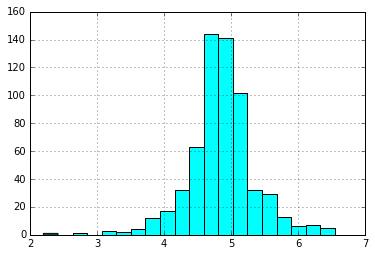

In [265]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20,color='cyan')
plt.show()

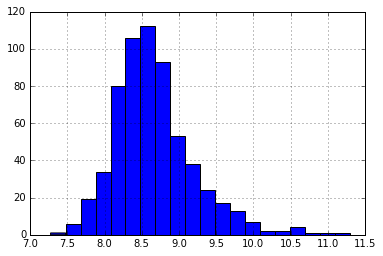

In [266]:
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']
train['TotalIncome_log'] = np.log(train['TotalIncome'])
train['TotalIncome_log'].hist(bins=20)
plt.show()

In [296]:
train.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term      True
Credit_History       False
Property_Area        False
Loan_Status          False
LoanAmount_log       False
TotalIncome          False
TotalIncome_log      False
dtype: bool

In [268]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [298]:
train['Loan_Amount_Term'].value_counts()
train['Loan_Amount_Term'].fillna(360.0,inplace=True)

Building the predictive model

In [269]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education',
          'Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    train[i] = le.fit_transform(train[i].astype('str'))
train.dtypes    

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [270]:
train['Credit_History'].value_counts()
train['Credit_History'].fillna(1.0,inplace=True)

In [271]:
#Importing models from scikit learn module
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [290]:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train1, test1 in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train1,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train1]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test1,:], data[outcome].iloc[test1]))
 
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

In [292]:
#Logistic Regression
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, train, predictor_var, outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [293]:
predictor_var = ['Credit_History','Education','Married',
                'Self_Employed','Property_Area']
classification_model(model, train, predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [294]:
#Decision Tree
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, train, predictor_var, outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [299]:
#different combination
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log']
classification_model(model,train,predictor_var,outcome_var)

Accuracy : 88.925%
Cross-Validation Score : 69.208%


In [301]:
#random forest
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model,train,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 77.689%


In [302]:
featimp = pd.Series(model.feature_importances_,index=predictor_var).sort_values(ascending=False)

In [303]:
print(featimp)

Credit_History      0.272265
TotalIncome_log     0.269080
LoanAmount_log      0.215227
Dependents          0.053644
Property_Area       0.047937
Loan_Amount_Term    0.041527
Gender              0.030055
Married             0.026154
Self_Employed       0.022416
Education           0.021695
dtype: float64


In [304]:
model = RandomForestClassifier(n_estimators=25,min_samples_split=25,max_depth=7,max_features=1)
predictor_var = ['TotalIncome_log','LoanAmount_log',
                 'Credit_History','Dependents','Property_Area']
classification_model(model,train,predictor_var,outcome_var)

Accuracy : 82.899%
Cross-Validation Score : 80.133%
